<a href="https://colab.research.google.com/github/oriname/Lab7202/blob/master/Lab_5_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint


In [23]:
!pip install pyg-nightly
!pip install scipy==1.8.1
!pip install -q grpcio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#from google.colab import drive
#drive.mount('/content/drive')
lastfm = pd.read_csv("email.txt",sep=" ",names=["start_node", "end_node"])
lastfm

start_node  end_node
0            17         1
1            72         1
2             3         2
3            19         2
4            20         2
..          ...       ...
618         136       132
619         141       133
620         135       134
621         140       134
622         143       142

[623 rows x 2 columns]

The graph is created from the facebook dataframe of the edges:

In [25]:
G = nx.from_pandas_edgelist(lastfm, "start_node", "end_node")

n = len(G)
m = len(G.edges())
n, m



(143, 623)

Visualizing the graph

Since we don’t have any real sense of structure in the data, let’s start by viewing the graph with random_layout, which is among the fastest of the layout functions.

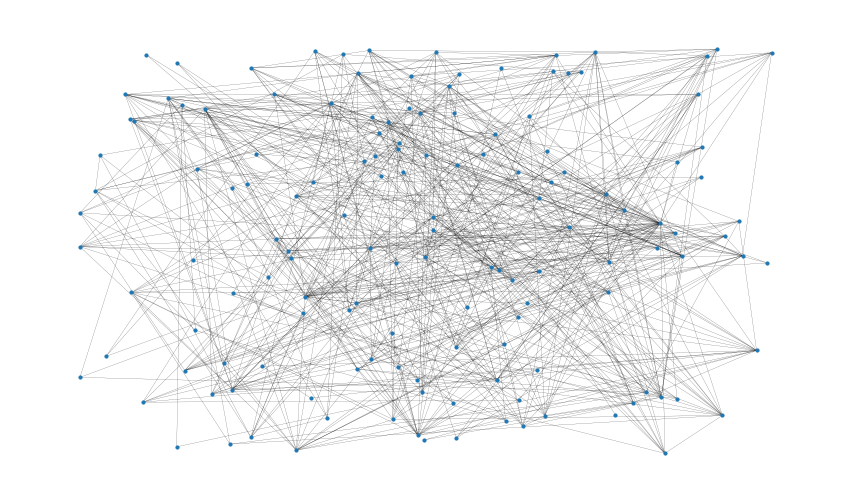

In [26]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

It’s clear that we need to impose more structure on the positioning of the if we want to get a sense for the data. For this, we can use the spring_layout function which is the default layout function for the networkx drawing module. The spring_layout function has the advantage that it takes into account the nodes and edges to compute locations of the nodes. The downside however, is that this process is much more computationally expensive, and can be quite slow for graphs with 100’s of nodes and 1000’s of edges.

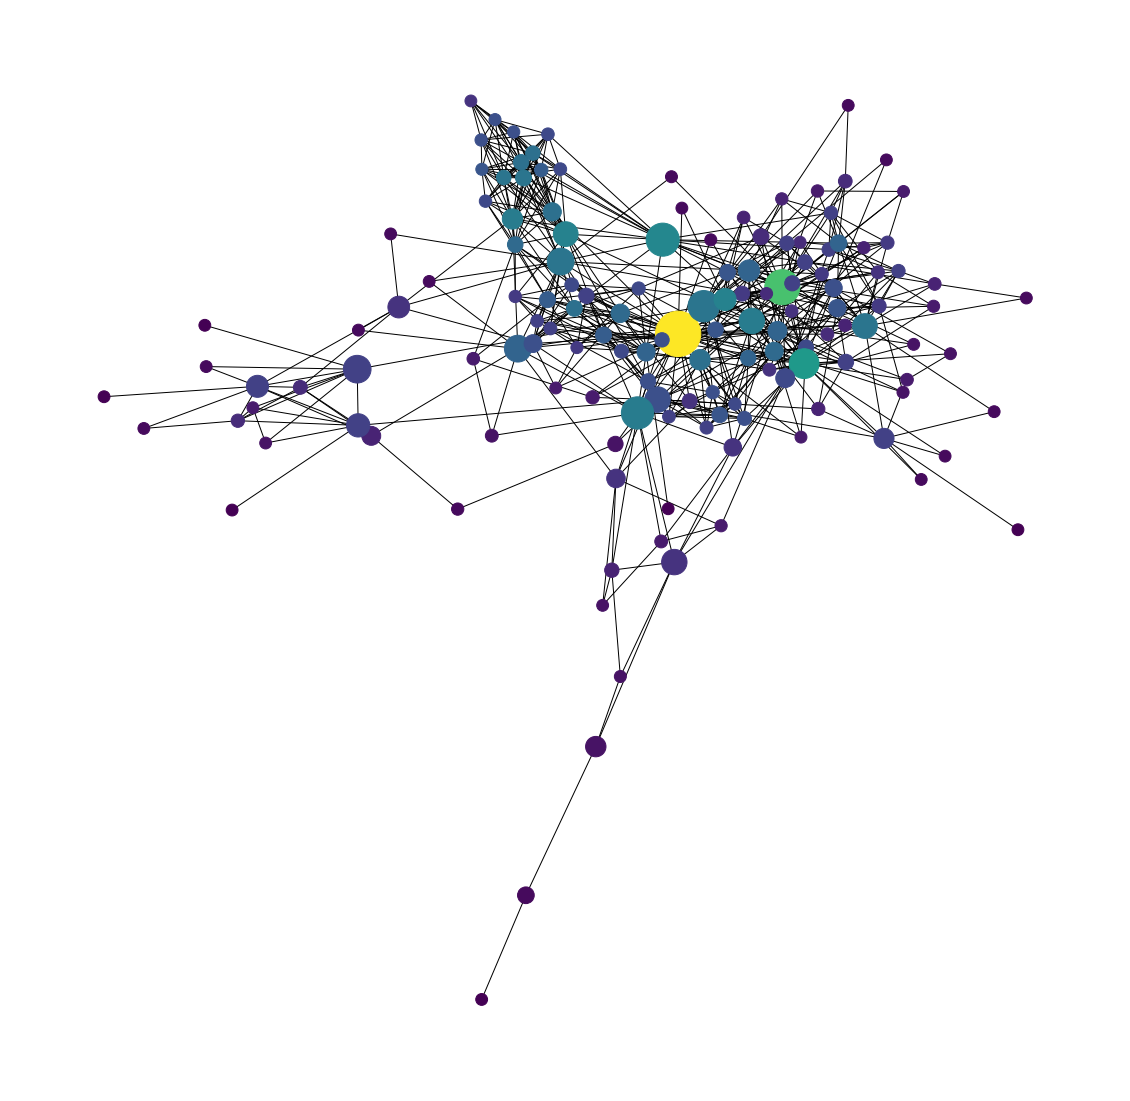

In [27]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [28]:
#Total number of nodes in network
G.number_of_nodes()


143

In [29]:
#Total number of edges
G.number_of_edges()

623

Also, the average degree of a node can be seen.

On average, a node is connected to almost 44 other nodes, also known as neighbors of the node.

This has been calculated by creating a list of all the degrees of the nodes and using numpy.array to find the mean of the created list.

In [30]:
np.mean([d for _, d in G.degree()])

8.713286713286713

We find the nodes with the highest degree centralities. Specifically, the nodes with the 8 highest degree centralities are shown below together with the degree centrality. That means that node 107
 has the highest degree centrality with 
, meaning that this facebook user is friends with around the 26% of the whole network.

In [31]:
degree_centrality = nx.centrality.degree_centrality(G)
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(105, 0.29577464788732394),
 (17, 0.2112676056338028),
 (95, 0.1619718309859155),
 (48, 0.14084507042253522),
 (132, 0.13380281690140847),
 (43, 0.13380281690140847),
 (31, 0.1267605633802817),
 (74, 0.1267605633802817)]

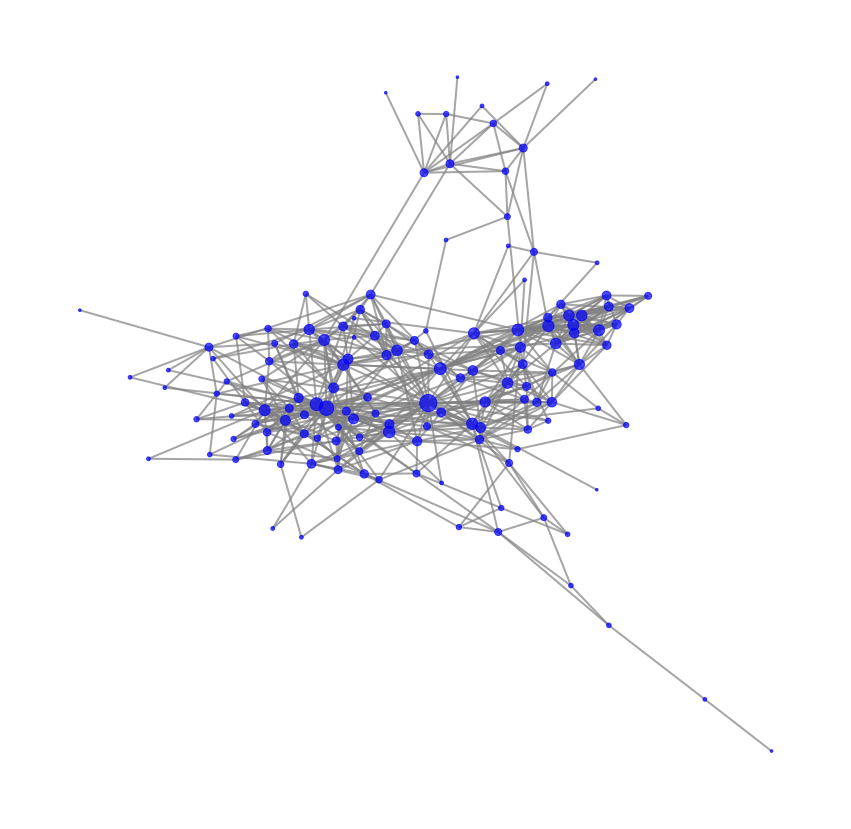

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Set up node sizes based on degree centrality
node_size = [v * 1000 for v in degree_centrality.values()]

# Set up plot parameters
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)

# Draw the network with thicker nodes and edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=node_size,
    with_labels=False,
    width=2.0,  # adjust the width parameter to make the edges thicker
    node_color="blue",
    alpha=0.7,
    edge_color="gray",
)
plt.axis("off")
plt.show()


Betweenness centrality measures the number of times a node lies on the shortest path between other nodes, meaning it acts as a bridge. In detail, betweenness centrality of a node 
 is the percentage of all the shortest paths of any two nodes (apart from 
), which pass through.

In [33]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458)]

In [34]:
lastfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  623 non-null    int64
 1   end_node    623 non-null    int64
dtypes: int64(2)
memory usage: 9.9 KB


(-0.6975955079690064,
 0.7238556926617767,
 -1.1869320179766272,
 0.9672369510873609)

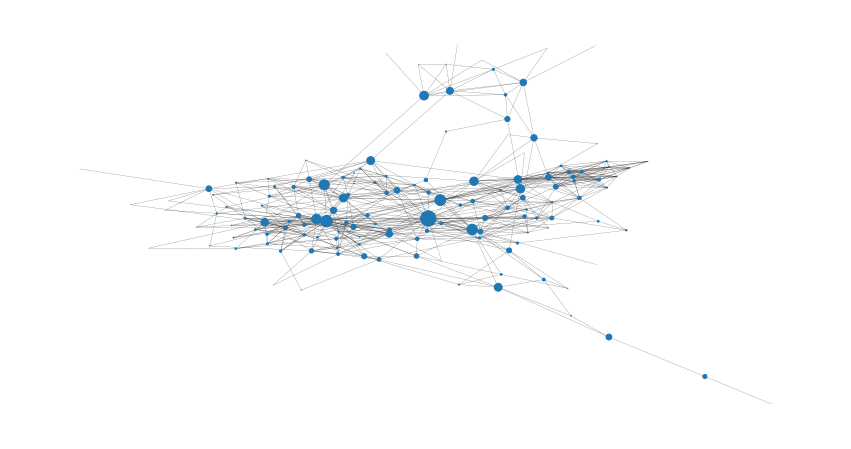

In [35]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

<ipython-input-36-917af9986f14>:5: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")


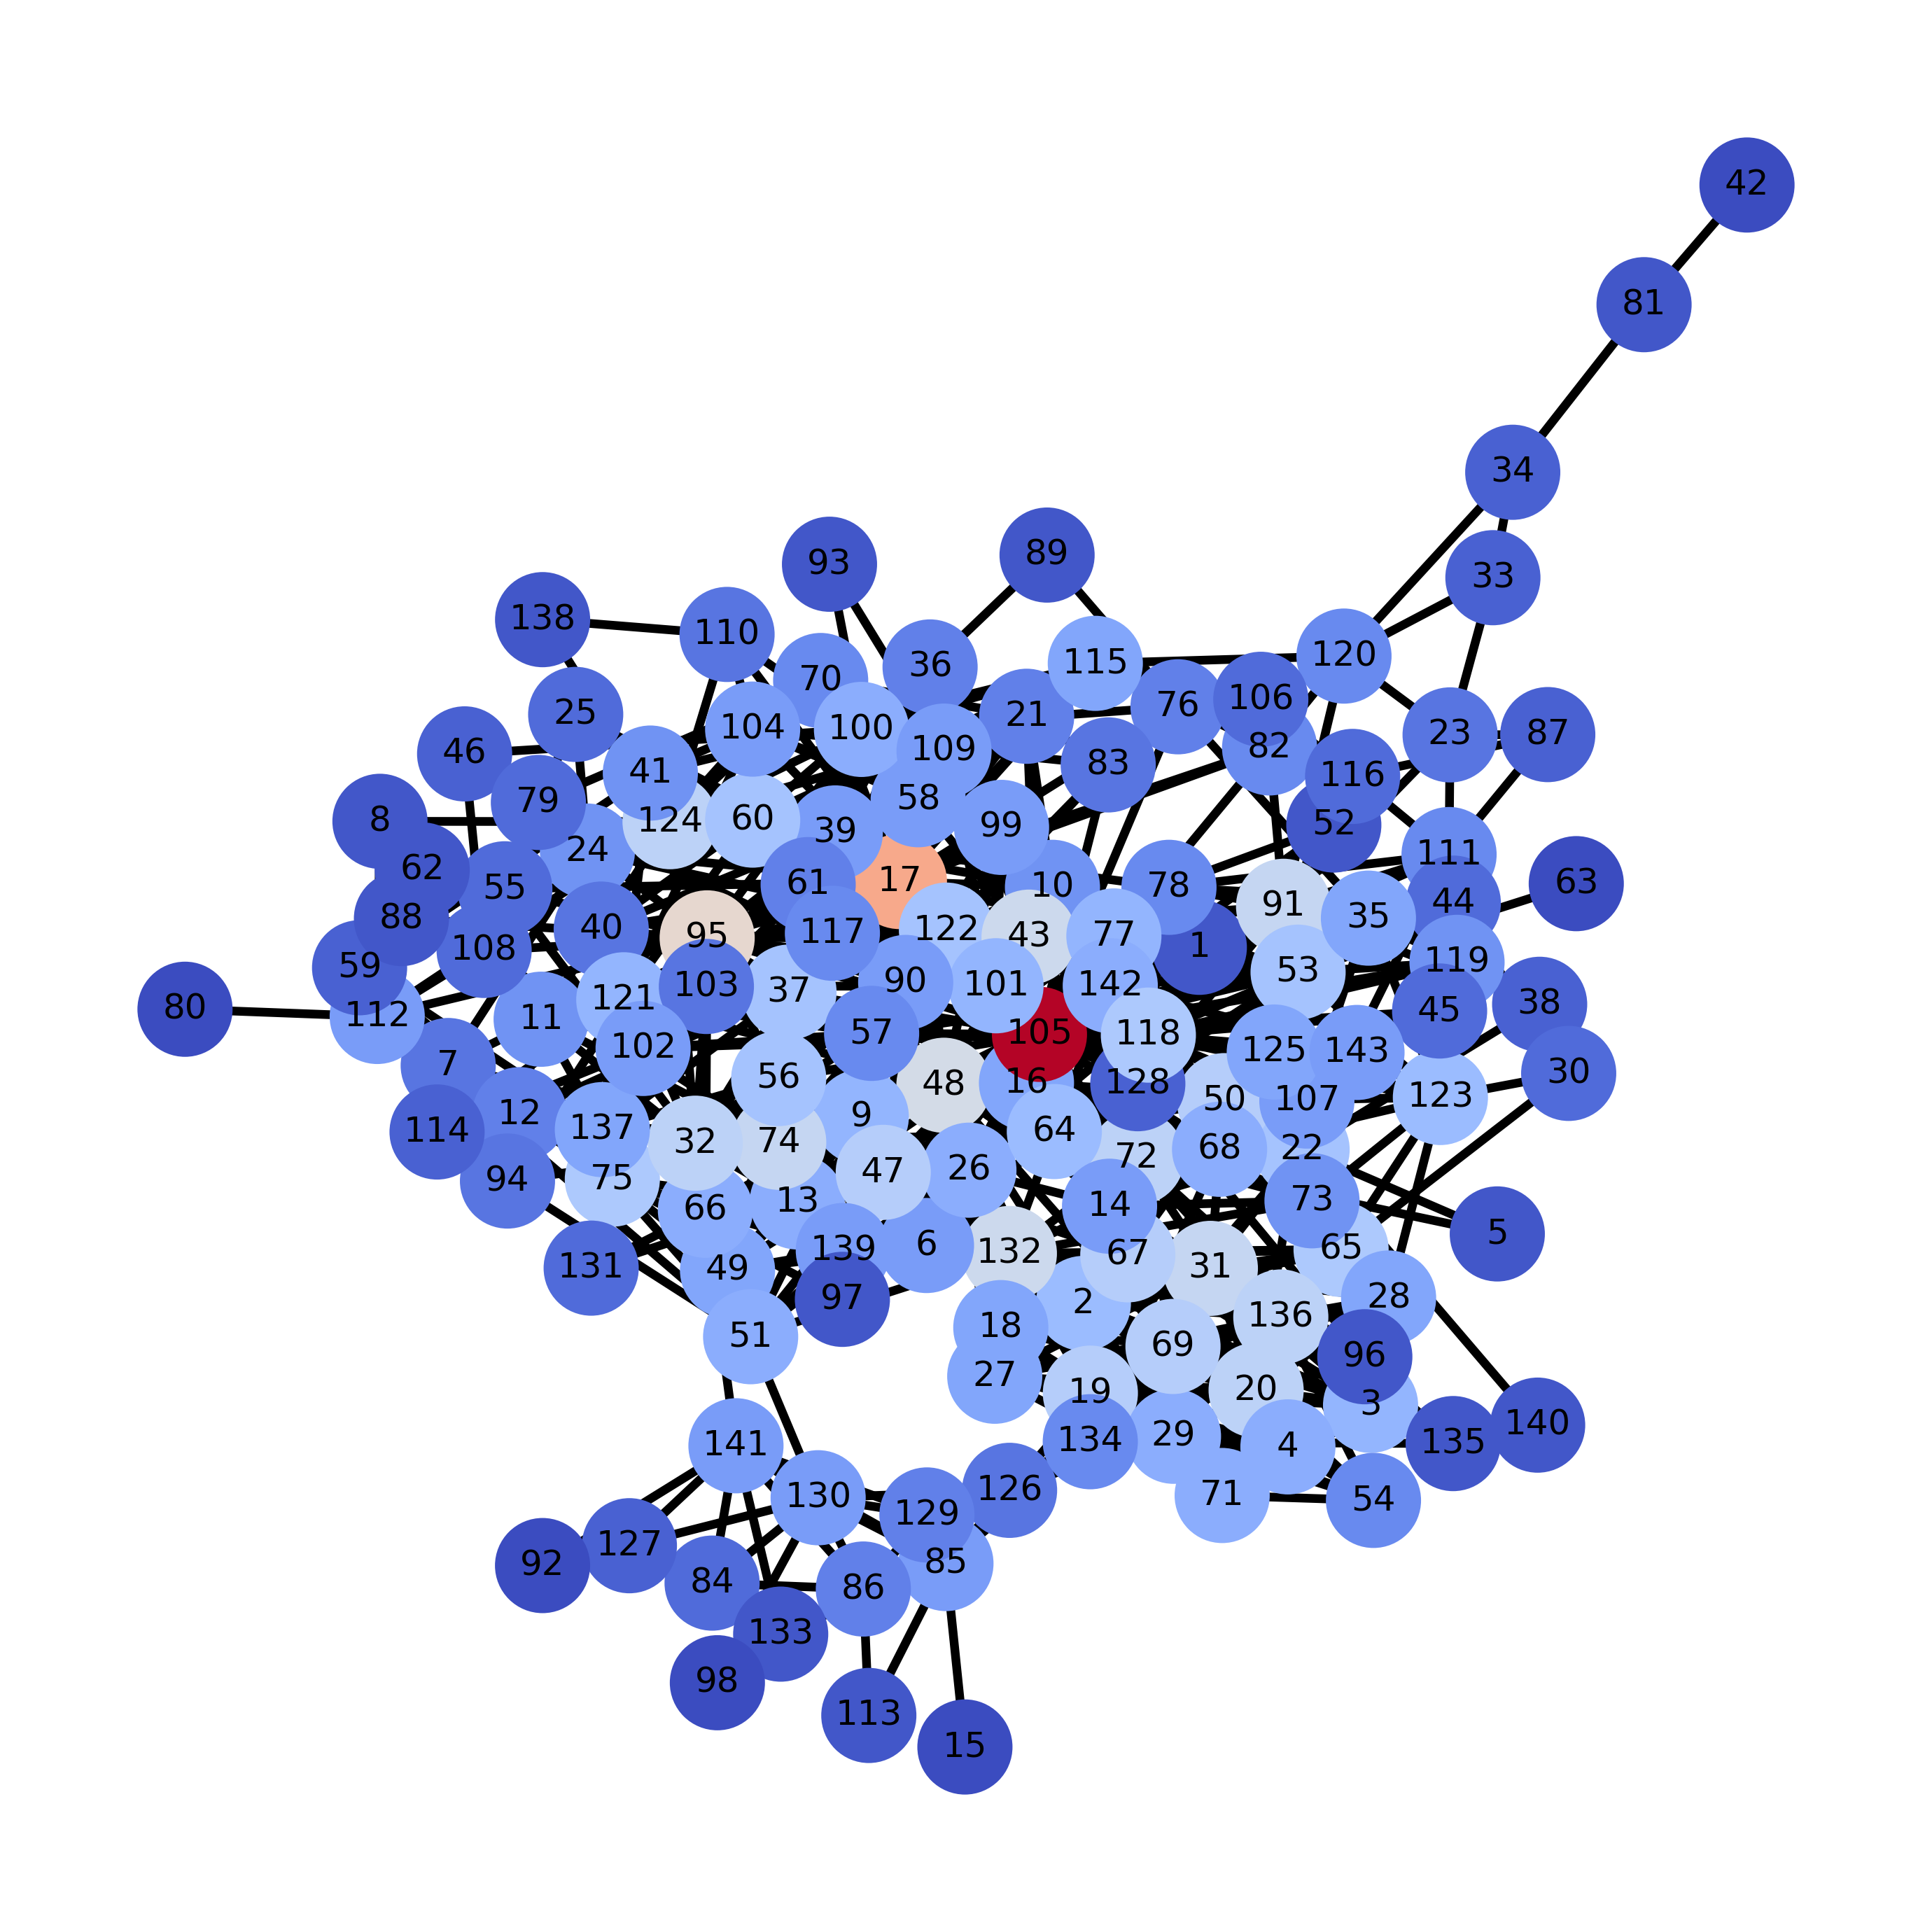

In [36]:
node_color=[float(G.degree(v)) for v in G]
cmap = plt.cm.coolwarm

plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="fdp")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

In [37]:
# Graph Density
nx.density(G)

0.061361174037230376

In [38]:
# Average Shortest Path Lenght
nx.average_shortest_path_length(G)

2.967004826159756

In [39]:
nx.diameter(G)

8

<ipython-input-40-8a1b500bdf66>:2: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G,prog="dot")


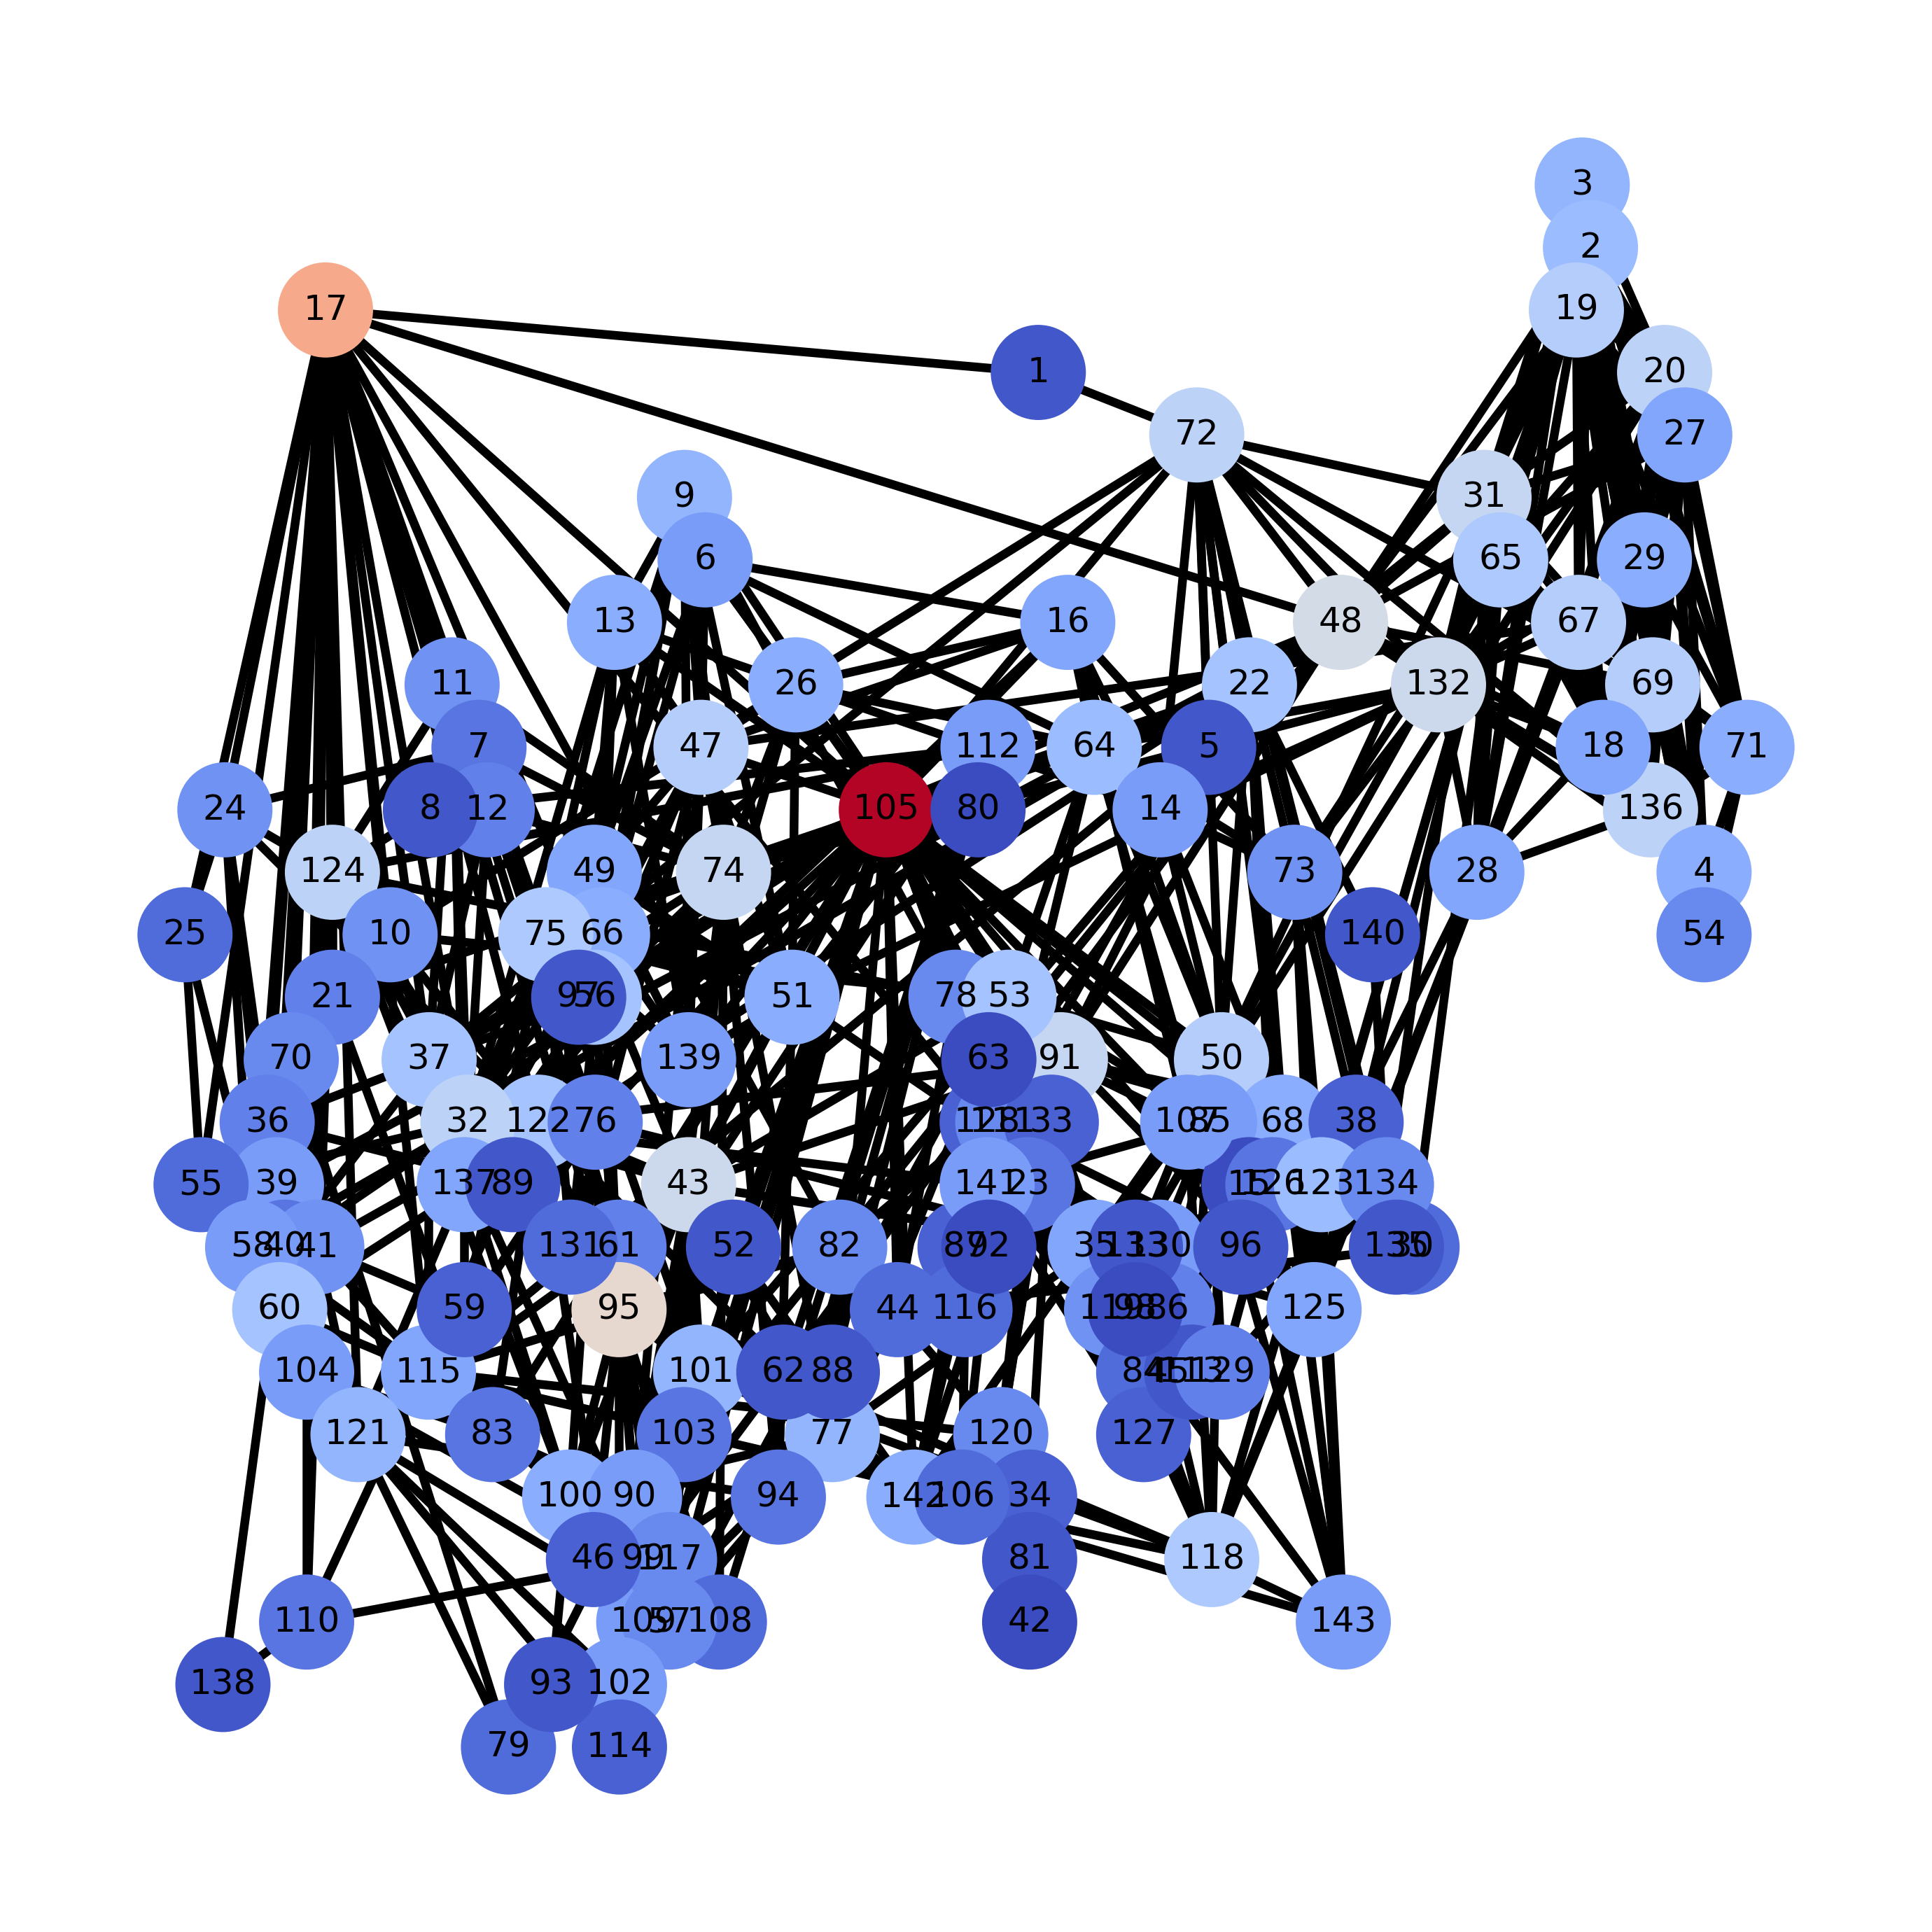

In [40]:
plt.figure(figsize=(9,9), dpi=300)
pos = nx.nx_pydot.graphviz_layout(G,prog="dot")
nx.draw(G, pos, node_color=node_color, node_size=1000, edge_color='k',
        width=3, with_labels=True, cmap=cmap)

plt.show()

In [41]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(G)

[frozenset({1,
            7,
            8,
            10,
            11,
            12,
            17,
            21,
            24,
            25,
            32,
            36,
            37,
            39,
            40,
            41,
            48,
            55,
            56,
            57,
            58,
            59,
            60,
            70,
            74,
            75,
            79,
            83,
            89,
            90,
            94,
            97,
            99,
            102,
            104,
            110,
            114,
            121,
            122,
            124,
            137,
            138}),
 frozenset({5,
            14,
            16,
            22,
            35,
            43,
            45,
            46,
            50,
            52,
            53,
            61,
            62,
            63,
            64,
            68,
            72,
            73,
            76,
            77,
 

In [42]:
print (list(nx.find_cliques(G)))

[[1, 72], [1, 17], [2, 136, 65, 67, 3, 132, 20, 31], [2, 136, 19, 132, 48, 31], [2, 136, 19, 132, 67, 20, 3, 31], [2, 136, 19, 132, 67, 20, 29], [2, 136, 19, 69, 48, 27, 31], [2, 136, 19, 69, 20, 27, 71], [2, 136, 19, 69, 20, 27, 31], [2, 136, 19, 69, 20, 67, 3, 31], [2, 136, 19, 69, 20, 67, 3, 71], [2, 136, 19, 69, 20, 67, 29, 71], [3, 136, 20, 4, 19, 71, 69], [3, 136, 20, 4, 19, 31, 132], [3, 136, 20, 4, 19, 31, 69], [3, 136, 20, 28, 67, 31, 65, 132], [3, 136, 20, 28, 67, 31, 19, 132], [3, 136, 20, 28, 67, 31, 19, 69], [4, 136, 19, 20, 132, 29], [4, 136, 19, 20, 69, 31, 27], [4, 136, 19, 20, 69, 71, 27], [4, 136, 19, 20, 69, 71, 29, 54], [5, 72, 22], [7, 24], [7, 74, 12, 75], [7, 74, 12, 11], [8, 112, 124], [9, 49, 66, 47, 51, 139], [9, 49, 66, 47, 13, 56], [9, 49, 66, 47, 13, 139], [9, 49, 66, 47, 13, 6], [9, 49, 75, 56, 13], [9, 49, 75, 139, 51], [9, 49, 75, 139, 13], [9, 74, 56, 75], [9, 91, 78], [10, 72, 37], [10, 17, 122], [10, 17, 37], [10, 17, 70, 124, 21], [10, 53], [11, 32, 

In [43]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break
  return edge

In [44]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [45]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [46]:
node_groups

[[1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  87,
  88,
  89,
  90,
  91,
  93,
  94,
  95,
  97,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  128,
  131,
  132,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  142,
  143],
 [96, 129, 130, 98, 133, 141, 15, 113, 84, 85, 86, 92, 126, 127]]

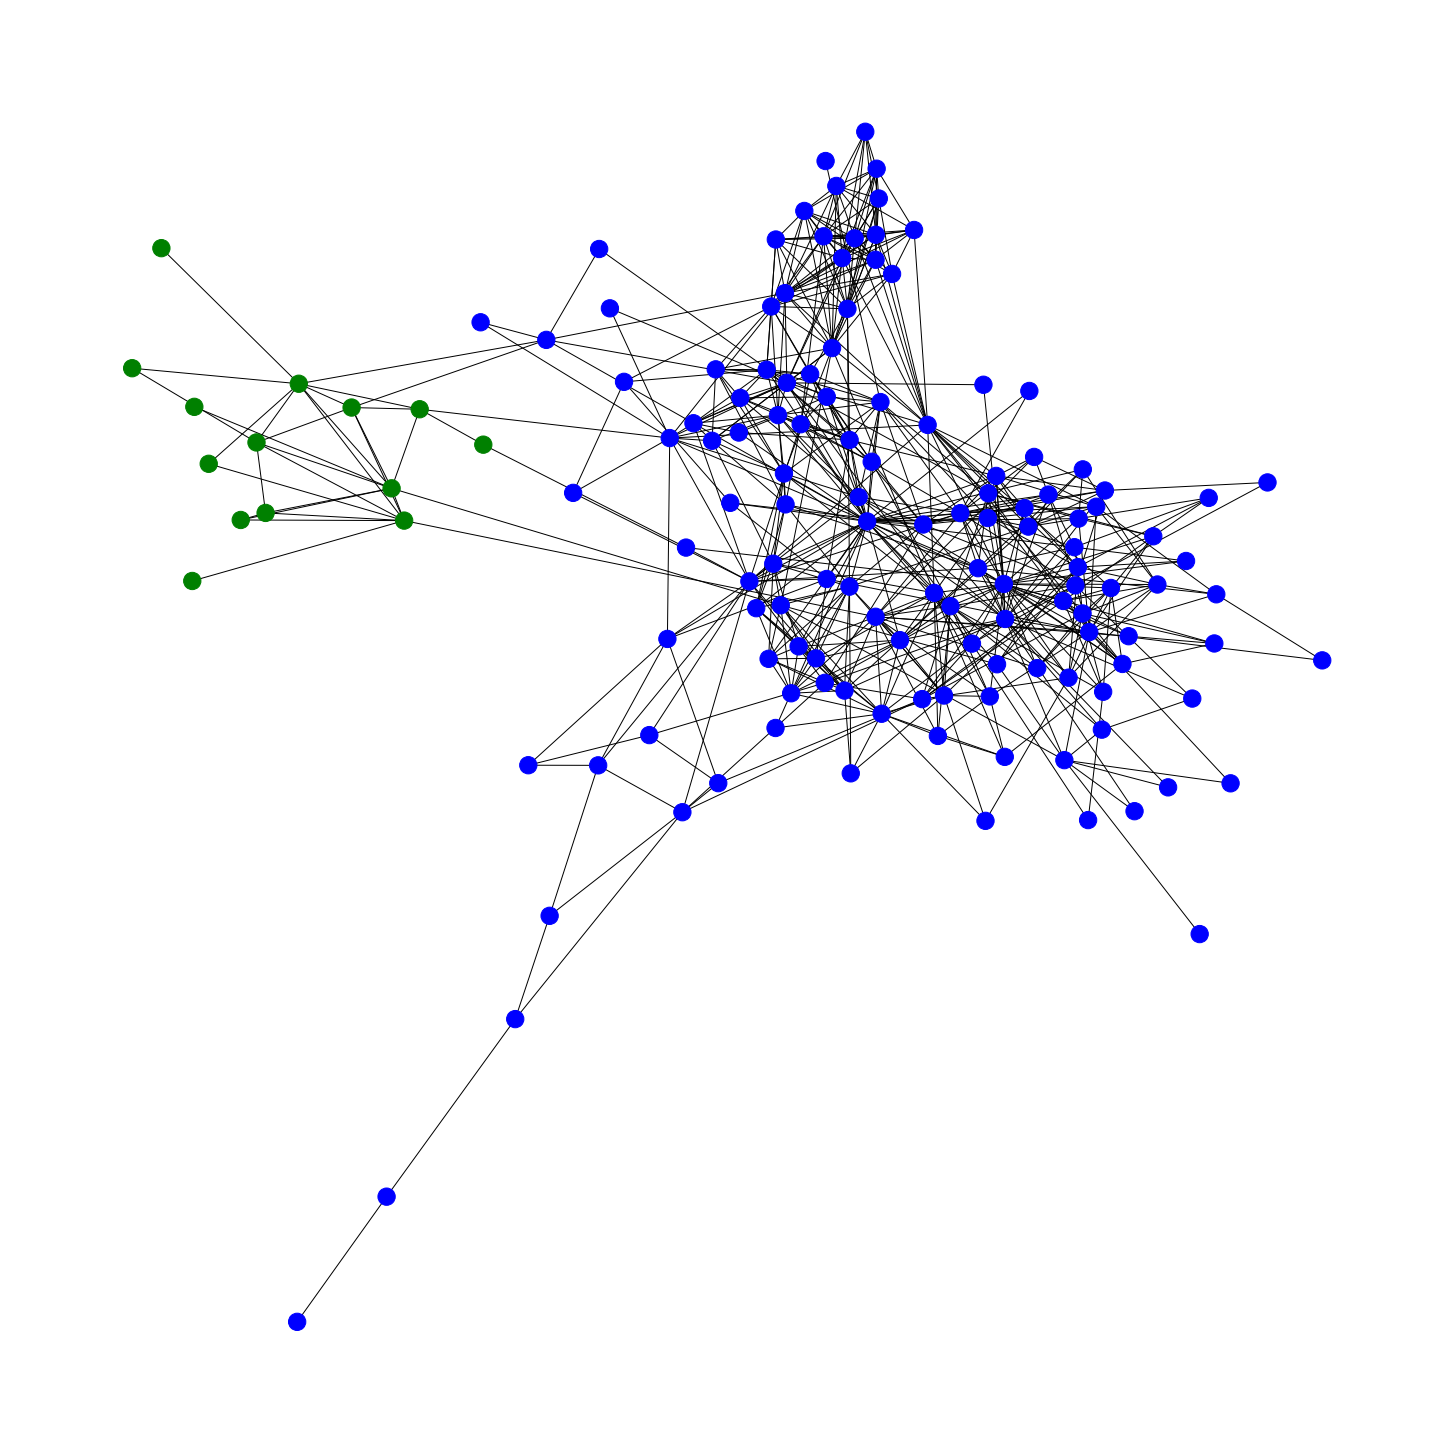

In [47]:
# plot the communities
''' color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() '''

''' 
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map)
plt.show() '''


# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

plt.figure(figsize=(20, 20))
nx.draw(G, node_color=color_map)
plt.show()



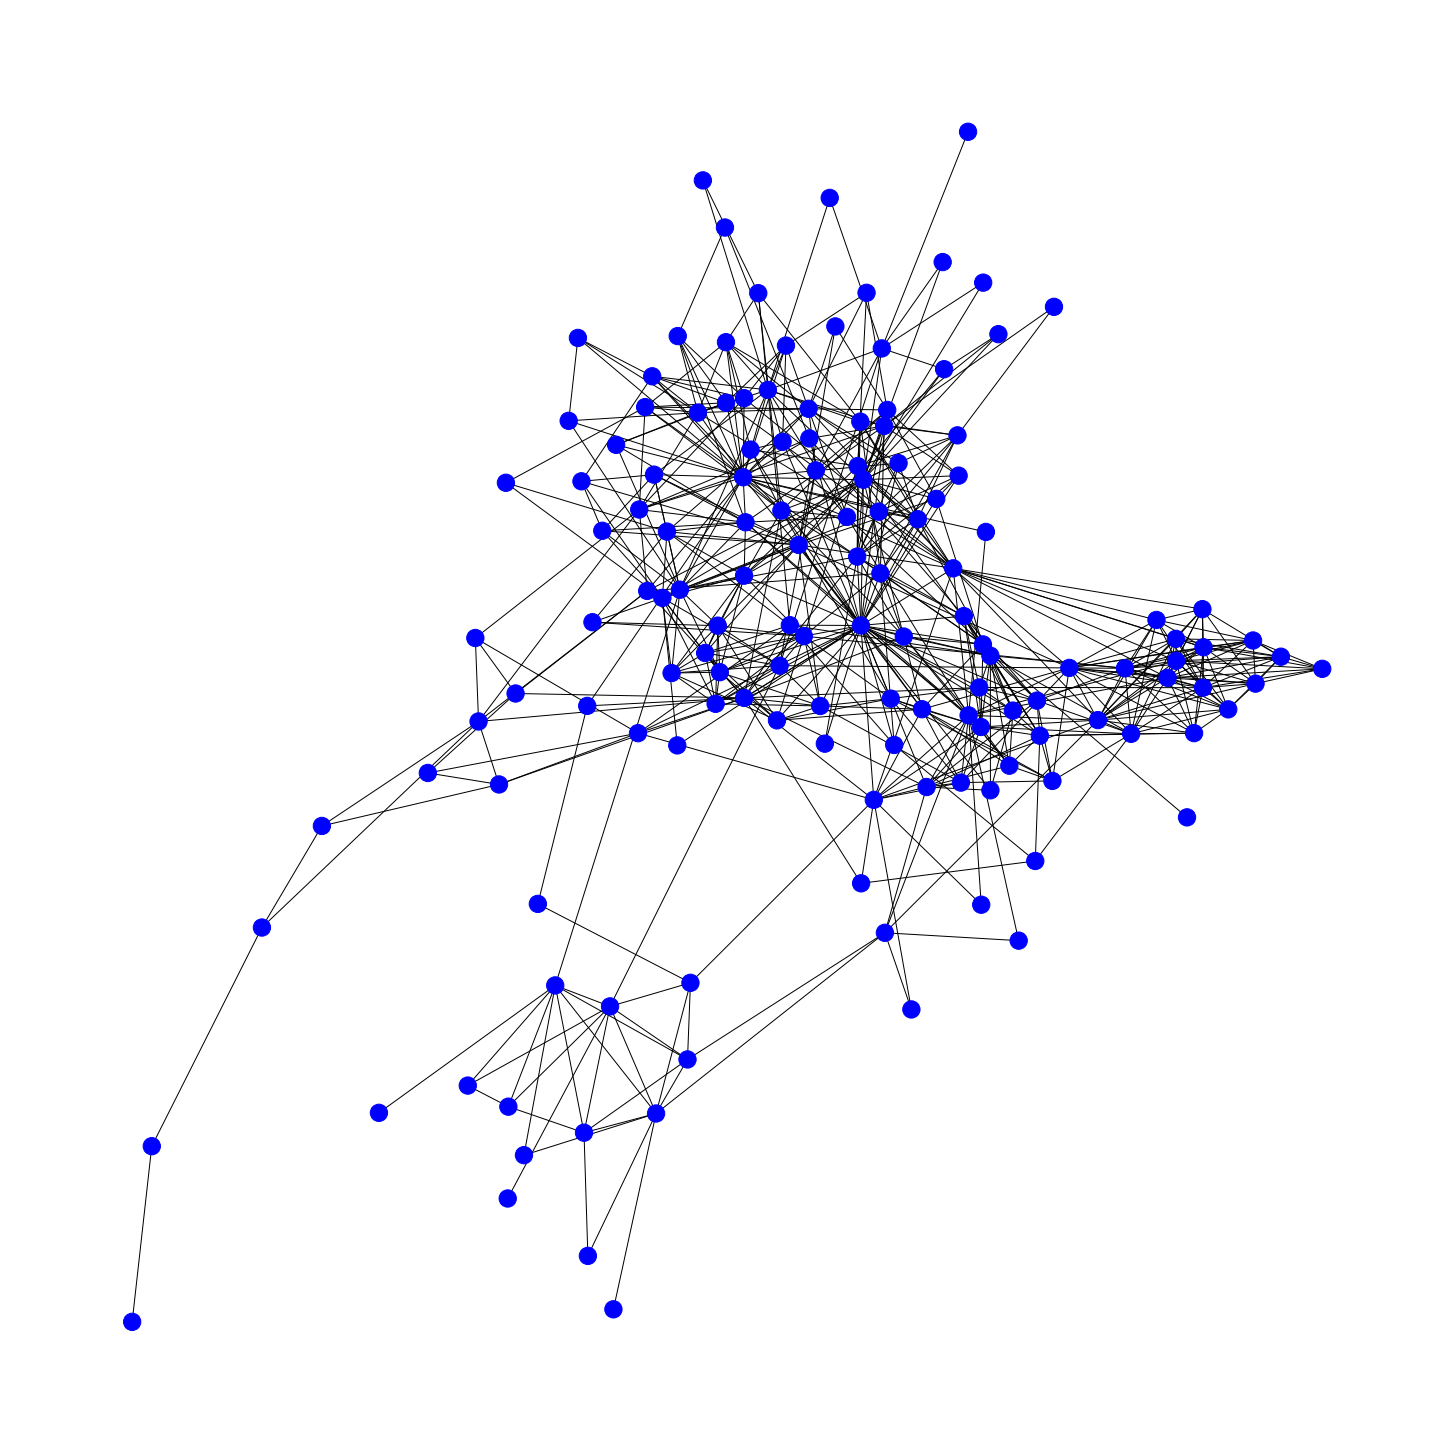

In [48]:
# plot the communities
color_map = []
center_map = []
for node_group in node_groups:
    center = nx.center(G.subgraph(node_group))
    center_map.append(center)
    for node in node_group:
        if node == center:
            color_map.append('red')
        elif node in center_map:
            color_map.append('yellow')
        else:
            color_map.append('blue')

plt.figure(figsize=(20, 20))
nx.draw(G, node_color=color_map)
plt.show()
